# Prediction Process for State Farm

Below is the process for configuring and training a Keras VGG model on an image classification task, selecting a high-performing model, and then applying the chosen model to test data to generate predictions.

- **Prepare Notebook and Import Libraries**
- **Set Up and Configure VGG Model**
- **Loading Training and Validation Data**
- **Finetune Based on Our Custom Categories**
- **Run Multiple Models and Evaluate Performance**
- **Inspect Top-Performing Model Performance**
- **Make Predictions on Test Data**

# Prepare Notebook and Import Libraries

In [1]:
#Import libraries
%matplotlib inline
import os, json
import numpy as np
import pandas as pd
from utils import *
from matplotlib import pyplot as plot
from utils import plots
from __future__ import division, print_function
from shutil import copyfile
import sys
from PIL import Image
from sklearn.metrics import confusion_matrix
from IPython.display import FileLink


path = "/sf_data"

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


# Set Up and Configure VGG Model

In [2]:
# Define number for batch processing of images during model training, validation and testing
batch_sizes = 64

# Define number of training epochs to run
num_of_epochs = 10

import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [3]:
vgg = Vgg16()

# Load Training and Validation Data

In [4]:
#Create references to important directories we will use over and over
current_dir = os.getcwd()
LESSON_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/sf_data'

In [15]:
%cd $DATA_HOME_DIR
%mkdir -p sample/train
%mkdir -p sample/test
%mkdir -p sample/valid
%mkdir -p sample/results
%mkdir -p test/unknown

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data


In [16]:
%mkdir -p valid/c0
%mkdir -p valid/c1
%mkdir -p valid/c2
%mkdir -p valid/c3
%mkdir -p valid/c4
%mkdir -p valid/c5
%mkdir -p valid/c6
%mkdir -p valid/c7
%mkdir -p valid/c8
%mkdir -p valid/c9
%mkdir -p sample/train/c0
%mkdir -p sample/train/c1
%mkdir -p sample/train/c2
%mkdir -p sample/train/c3
%mkdir -p sample/train/c4
%mkdir -p sample/train/c5
%mkdir -p sample/train/c6
%mkdir -p sample/train/c7
%mkdir -p sample/train/c8
%mkdir -p sample/train/c9
%mkdir -p sample/valid/c0
%mkdir -p sample/valid/c1
%mkdir -p sample/valid/c2
%mkdir -p sample/valid/c3
%mkdir -p sample/valid/c4
%mkdir -p sample/valid/c5
%mkdir -p sample/valid/c6
%mkdir -p sample/valid/c7
%mkdir -p sample/valid/c8
%mkdir -p sample/valid/c9

## Move Files to Prepare Validation

In [17]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c0
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c0/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c0


In [18]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c1
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c1/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c1


In [19]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c2
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c2/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c2


In [20]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c3
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c3/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c3


In [21]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c4
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c4/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c4


In [22]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c5
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c5/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c5


In [23]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c6
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c6/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c6


In [24]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c7
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c7/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c7


In [25]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c8
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c8/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c8


In [26]:
# Get all filenames in a random order, to prepare for separation into validation data
%cd $DATA_HOME_DIR
%cd train/c9
g = glob('*.jpg')
shuf = np.random.permutation(g)
# Move 400 files into appropriate validation folder
for i in range(400): os.rename(shuf[i], DATA_HOME_DIR+'/valid/c9/'+shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data
/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c9


## Copy Files To Prepare Sample

In [27]:
%cd $DATA_HOME_DIR/train/c0
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c0' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c0


In [28]:
%cd $DATA_HOME_DIR/train/c1
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c1' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c1


In [29]:
%cd $DATA_HOME_DIR/train/c2
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c2' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c2


In [30]:
%cd $DATA_HOME_DIR/train/c3
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c3' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c3


In [31]:
%cd $DATA_HOME_DIR/train/c4
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c4' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c4


In [32]:
%cd $DATA_HOME_DIR/train/c5
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c5' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c5


In [33]:
%cd $DATA_HOME_DIR/train/c6
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c6' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c6


In [34]:
%cd $DATA_HOME_DIR/train/c7
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c7' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c7


In [35]:
%cd $DATA_HOME_DIR/train/c8
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c8' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c8


In [36]:
%cd $DATA_HOME_DIR/train/c9
g = glob('*.jpg')
shuf = np.random.permutation(g)
for i in range(20): copyfile(shuf[i], DATA_HOME_DIR+'/sample/train/c9' + shuf[i])

/home/ubuntu/fastai/courses/deeplearning1/nbs/sf_data/train/c9


## Load Data for Model Processing

In [5]:
batches = vgg.get_batches(DATA_HOME_DIR+'/train',batch_size=batch_sizes)
val_batches = vgg.get_batches(DATA_HOME_DIR+'/valid', batch_size=batch_sizes)

Found 18424 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.


# Finetune Based On Custom Categories

In [6]:
# Calling finetune allows us to adjust the default VGG model to be trained
# on our custom categories
vgg.finetune(batches)

# Run Multiple Models and Evaluate Performance

In [7]:
# Loop through each training epoch and evaluate model performance
# By assessing where maximum validation accuracy occurs
latest_weights_filename = None
for epoch in range(num_of_epochs):
    print("Running epoch #%d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    # Save weights for each epoch
    latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(DATA_HOME_DIR+'/results/'+latest_weights_filename)
print ("")
print ("Completed %d iterations" % num_of_epochs)

Running epoch #0
Epoch 1/1
18424/18424 [==============================] - 570s - loss: 1.9956 - acc: 0.4465 - val_loss: 0.4944 - val_acc: 0.8648
Running epoch #1
Epoch 1/1
18424/18424 [==============================] - 571s - loss: 1.0805 - acc: 0.6501 - val_loss: 0.3516 - val_acc: 0.9083
Running epoch #2
Epoch 1/1
18424/18424 [==============================] - 570s - loss: 0.9473 - acc: 0.6922 - val_loss: 0.3398 - val_acc: 0.9115
Running epoch #3
Epoch 1/1
18424/18424 [==============================] - 569s - loss: 0.8661 - acc: 0.7188 - val_loss: 0.2777 - val_acc: 0.9223
Running epoch #4
Epoch 1/1
18424/18424 [==============================] - 569s - loss: 0.8653 - acc: 0.7227 - val_loss: 0.2734 - val_acc: 0.9295
Running epoch #5
Epoch 1/1
18424/18424 [==============================] - 569s - loss: 0.8387 - acc: 0.7331 - val_loss: 0.2651 - val_acc: 0.9245
Running epoch #6
Epoch 1/1
18424/18424 [==============================] - 569s - loss: 0.8424 - acc: 0.7371 - val_loss: 0.2796 - v

# Inspect Top Model Performance

In [8]:
# Load saved weights for optimal model
vgg.model.load_weights(DATA_HOME_DIR+'/results/ft2.h5')

In [10]:
# Create test-set predictions
batches, preds = vgg.test(DATA_HOME_DIR+'/test/', batch_size = batch_sizes*2)

Found 79726 images belonging to 1 classes.


In [12]:
# Take a look at prediction format
print(preds[:5])
filenames = batches.filenames
print(filenames[:5])

[[  4.0011e-02   3.7019e-03   4.7923e-05   3.0854e-04   9.0587e-04   1.1403e-01   2.8138e-01
    4.9629e-03   8.9906e-03   5.4567e-01]
 [  9.0960e-01   4.5681e-04   3.1068e-05   1.5707e-03   3.4607e-05   4.1793e-03   6.3138e-03
    1.2654e-02   6.2718e-02   2.4442e-03]
 [  3.1888e-03   4.0614e-05   5.6021e-02   7.0614e-02   6.4503e-01   1.8366e-03   3.7796e-02
    3.3773e-05   1.8382e-01   1.6217e-03]
 [  1.0818e-03   4.2004e-04   5.1652e-02   6.3102e-04   8.6078e-03   4.3608e-04   1.7198e-01
    1.4773e-02   7.2921e-01   2.1212e-02]
 [  2.7459e-02   2.3743e-02   7.3859e-03   3.8590e-04   7.8517e-03   2.5247e-02   6.9807e-01
    1.4010e-03   1.7627e-01   3.2190e-02]]
['unknown/img_81601.jpg', 'unknown/img_14887.jpg', 'unknown/img_62885.jpg', 'unknown/img_45125.jpg', 'unknown/img_22633.jpg']


In [14]:
# Save predictions for future use
save_array(DATA_HOME_DIR+'/results/test_preds.dat', preds)
save_array(DATA_HOME_DIR+'/results/filenames.dat', filenames)

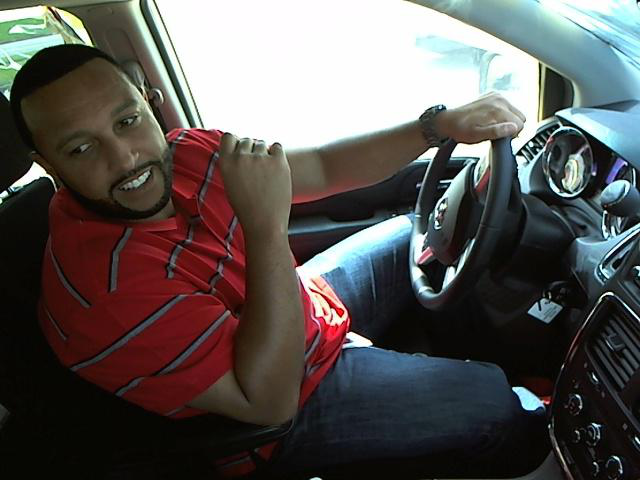

In [17]:
# Inspect images to confirm order of predictions
Image.open(DATA_HOME_DIR+'/test/unknown/img_81601.jpg')

# Validation Confidence Matrix

In [18]:
val_batches, probs = vgg.test(DATA_HOME_DIR+'/valid/', batch_size=batch_sizes)

Found 4000 images belonging to 10 classes.


In [39]:
val_filenames = val_batches.filenames
val_expected_values = val_batches.classes

# Compress predictions into array of labels
val_predictions = np.apply_along_axis(lambda x: np.argmax(x), axis=1, arr=probs )

In [32]:
val_batches.classes

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

[[388   0   1   1   1   3   1   0   1   4]
 [ 28 346   0   1   1   6  13   0   3   2]
 [  6   0 381   0   1   1   6   2   3   0]
 [ 18   0   1 365   8   0   3   0   3   2]
 [ 32   0   1   2 357   5   0   0   3   0]
 [  4   0   0   1   0 395   0   0   0   0]
 [  8   1   2   0   0   2 376   2   9   0]
 [  5   0   1   0   0   5   0 387   1   1]
 [ 15   2   7   1   1   7   7  15 341   4]
 [ 77   0   0   0   3   4   3   0  17 296]]


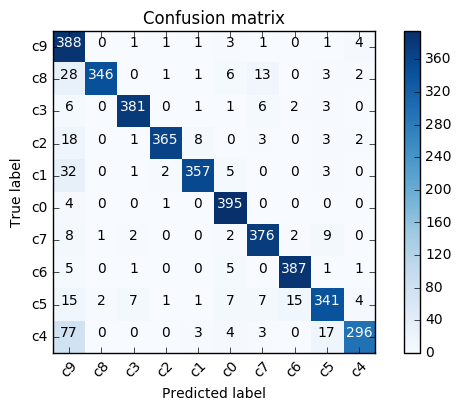

In [40]:
cm = confusion_matrix(val_expected_values, val_predictions)
plot_confusion_matrix(cm, val_batches.class_indices)

# Generate Kaggle Predictions

In [41]:
# Load prediction data
preds = load_array(DATA_HOME_DIR+'/results/test_preds.dat')
filenames = load_array(DATA_HOME_DIR+'/results/filenames.dat')

In [42]:
preds

array([[  4.0011e-02,   3.7019e-03,   4.7923e-05, ...,   4.9629e-03,   8.9906e-03,   5.4567e-01],
       [  9.0960e-01,   4.5681e-04,   3.1068e-05, ...,   1.2654e-02,   6.2718e-02,   2.4442e-03],
       [  3.1888e-03,   4.0614e-05,   5.6021e-02, ...,   3.3773e-05,   1.8382e-01,   1.6217e-03],
       ..., 
       [  1.2965e-01,   1.6112e-03,   4.0981e-05, ...,   3.9354e-03,   5.9895e-01,   1.3679e-04],
       [  7.6683e-01,   5.1487e-04,   1.7655e-04, ...,   7.1989e-03,   2.4132e-02,   9.1166e-02],
       [  8.1014e-01,   1.7872e-04,   1.5377e-04, ...,   1.7551e-04,   1.5935e-03,   2.9942e-03]], dtype=float32)

In [43]:
# Clip predictions
preds = preds.clip(min=.0705,max=.9295)

In [44]:
preds

array([[ 0.0705,  0.0705,  0.0705, ...,  0.0705,  0.0705,  0.5457],
       [ 0.9096,  0.0705,  0.0705, ...,  0.0705,  0.0705,  0.0705],
       [ 0.0705,  0.0705,  0.0705, ...,  0.0705,  0.1838,  0.0705],
       ..., 
       [ 0.1297,  0.0705,  0.0705, ...,  0.0705,  0.5989,  0.0705],
       [ 0.7668,  0.0705,  0.0705, ...,  0.0705,  0.0705,  0.0912],
       [ 0.8101,  0.0705,  0.0705, ...,  0.0705,  0.0705,  0.0705]], dtype=float32)

In [45]:
filenames

array(['unknown/img_81601.jpg', 'unknown/img_14887.jpg', 'unknown/img_62885.jpg', ...,
       'unknown/img_98750.jpg', 'unknown/img_42858.jpg', 'unknown/img_98905.jpg'], 
      dtype='|S22')

In [46]:
edited_filenames = map(lambda x:x[8:], filenames)

In [53]:
len(edited_filenames)

79726

In [54]:
len(preds)

79726

In [65]:
df = pd.DataFrame(preds)

In [68]:
df.insert(0, 'img', edited_filenames)

In [72]:
df.columns = ['img','c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

In [73]:
df[:5]

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_81601.jpg,0.070500,0.0705,0.0705,0.070500,0.070500,0.114026,0.281376,0.0705,0.070500,0.54567
1,img_14887.jpg,0.909598,0.0705,0.0705,0.070500,0.070500,0.070500,0.070500,0.0705,0.070500,0.07050
2,img_62885.jpg,0.070500,0.0705,0.0705,0.070614,0.645027,0.070500,0.070500,0.0705,0.183820,0.07050
3,img_45125.jpg,0.070500,0.0705,0.0705,0.070500,0.070500,0.070500,0.171979,0.0705,0.729208,0.07050
4,img_22633.jpg,0.070500,0.0705,0.0705,0.070500,0.070500,0.070500,0.698070,0.0705,0.176266,0.07050


In [74]:
df.to_csv(DATA_HOME_DIR+'/results/results.csv')